In [269]:
##### import sys
from time import time
import numpy as np
import pandas as pd
import os.path
from os import path
from scenario import Scenario
from sir_model import EpidemicModel, patient_zeros_states, symptomatic_individuals
# SIR parameters
location="networks"
N=50000
## new try with 100 spreaders
N_patient_zero = 20;
lamb = 0.03;
mu = 0.05;
scale=1.0; # Easy Case
T=100;
seed=2
t1 = 10;
# trac parameters
trac_tau = 5;
# MF parameters
MF_taus = [5];
MF_deltas = [15];
# observation parameters
n_rankings = [25]
#seed = int(sys.argv[2]);
#seeds for running [32,123,456]
#seed=int(sys.argv[1]);
################################################
n_ranking = n_rankings[0]
MF_tau = MF_taus[0];
MF_delta = MF_deltas[0];

no_int = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed), sep="\t")
scenario_rnd = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_rnd.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking), sep="\t")
scenario_trac = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_trac_t%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau), sep="\t")
scenario_MF = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_MF_t%d_d%d.csv"%(N/1000,T,t1,
                                                                                                            N_patient_zero,mu,lamb,seed,n_ranking,MF_tau,MF_delta), sep="\t")
scenario_BP = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp%d.csv"%(N,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau)
              , sep="\t")

#scenario_BP_plus = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp_ok%d.csv"%(N,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau)
#              , sep="\t")



In [280]:
scenario_rnd.keys()

Index(['S', 'I', 'R', 'q', 'free_birds'], dtype='object')

(0.0, 100.0)

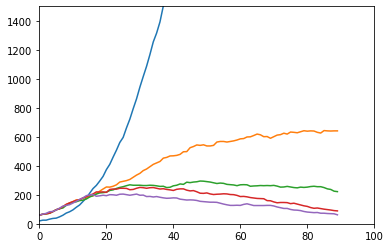

In [281]:
q = "I"
ax = no_int[q].plot()
ax = scenario_rnd[q].plot(ax=ax,label="rnd")
ax = scenario_trac[q].plot(ax=ax, label="scenario_trac")
ax = scenario_MF[q].plot(ax=ax, label="scenario_MF")
ax = scenario_BP[q].plot(ax=ax, label="scenario_BP")
#ax = scenario_BP_plus[q].plot(ax=ax, label="scenario_BP auto")
ax.set_ylim(0,1500)
ax.set_xlim(0,100)

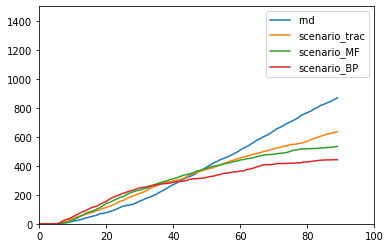

In [282]:
q = "q"
ax = scenario_rnd[q].plot(label="rnd")
ax = scenario_trac[q].plot(ax=ax, label="scenario_trac")
ax = scenario_MF[q].plot(ax=ax, label="scenario_MF")
ax = scenario_BP[q].plot(ax=ax, label="scenario_BP")
#ax = scenario_BP_plus[q].plot(ax=ax, label="scenario_BP auto")
ax.set_ylim(0,1500)
ax.set_xlim(0,100)

ax.legend()

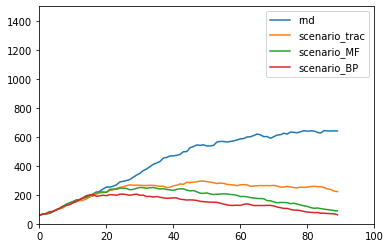

In [275]:
q = "I"
ax = scenario_rnd[q].plot(label="rnd")
ax = scenario_trac[q].plot(ax=ax, label="scenario_trac")
ax = scenario_MF[q].plot(ax=ax, label="scenario_MF")
ax = scenario_BP[q].plot(ax=ax, label="scenario_BP")
#ax = scenario_BP_plus[q].plot(ax=ax, label="scenario_BP auto")
ax.set_ylim(0,1500)
ax.set_xlim(0,100)

ax.legend()

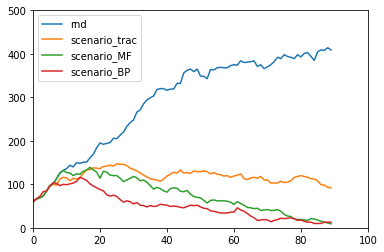

In [273]:
q = "free_birds"
#ax = no_int[q].plot(label="no_int")
ax = scenario_rnd[q].plot(label="rnd")
ax = scenario_trac[q].plot(ax=ax, label="scenario_trac")
ax = scenario_MF[q].plot(ax=ax, label="scenario_MF")
ax = scenario_BP[q].plot(ax=ax, label="scenario_BP")
#ax = scenario_BP_plus[q].plot(ax=ax, label="scenario_BP pauto")
ax.set_ylim(0,500)
ax.set_xlim(0,100)

ax.legend()

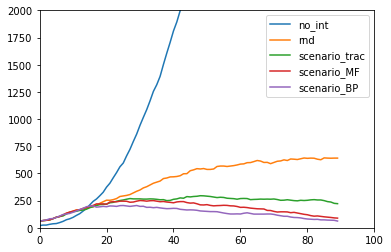

In [274]:
ax = no_int["I"].plot(label="no_int")
ax = scenario_rnd["I"].plot(ax=ax, label="rnd")
ax = scenario_trac["I"].plot(ax=ax, label="scenario_trac")
ax = scenario_MF["I"].plot(ax=ax, label="scenario_MF")
ax = scenario_BP["I"].plot(ax=ax, label="scenario_BP")
ax.set_ylim(0,2000)
ax.set_xlim(0,100)

ax.legend()

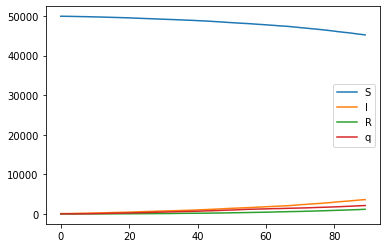

In [99]:
scenario_trac.plot()

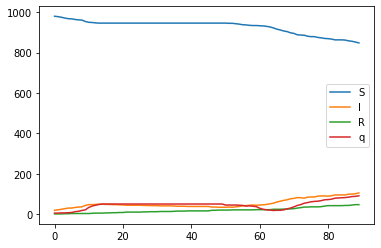

In [8]:
scenario_MF.plot()

In [4]:
import numpy as np
import networkx as nx
N=50000
scale=1.0; # Easy Case
radius = 5*scale
def p_dist(d):
    return np.exp(-d/scale)
x_pos = np.sqrt(N)*np.random.rand(N)
y_pos = np.sqrt(N)*np.random.rand(N)
# for soft geometric graph generation
pos  = {i: (x, y) for i, (x, y) in enumerate(zip(x_pos,y_pos))}


In [6]:
g=nx.soft_random_geometric_graph(
    N, radius=radius, p_dist=p_dist, pos=pos
)


In [7]:
%time nx.soft_random_geometric_graph(N, radius=radius, p_dist=p_dist, pos=pos)

CPU times: user 10.4 s, sys: 239 ms, total: 10.6 s
Wall time: 10.6 s
